<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB2/blob/main/6351071043_LAB2_Bai4(Trang26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Thành Luân - 6351071043

Tải dữ liệu và Tiền xử lý cơ bản
Dữ liệu Red Wine Quality từ UCI thường sử dụng dấu chấm phẩy ; để ngăn cách các cột, nên ta cần tham số sep=';' khi đọc file.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('winequality-red.csv', sep=',')

print("\nKiểm tra dữ liệu trống:")
print(data.isnull().sum())


Kiểm tra dữ liệu trống:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


3. Khảo sát độ tương đồng

Vẽ Heatmap để xem tương quan giữa các chất hóa học và chất lượng rượu.

Nguyễn Thành Luân - 6351071043


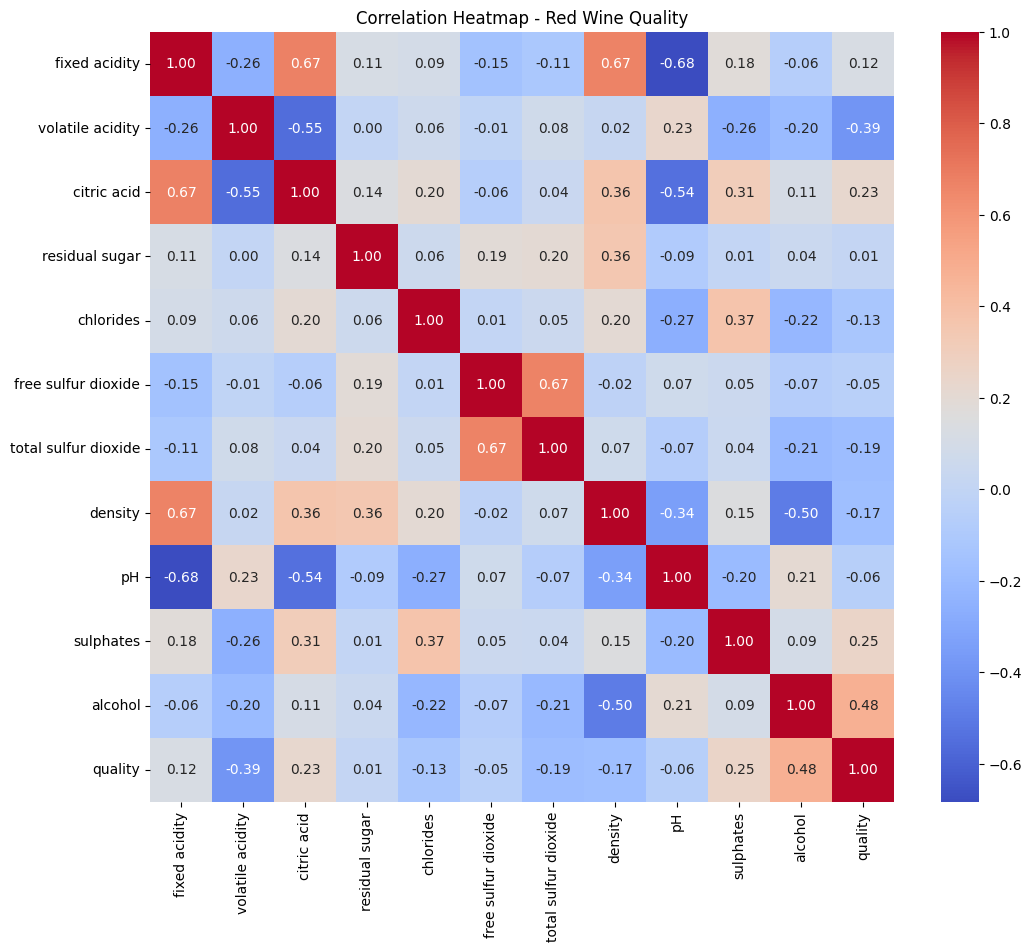

In [5]:
print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap - Red Wine Quality")
plt.show()

4. Tách dữ liệu

6.Ta thực hiện chia dữ liệu theo tỉ lệ 70% Train - 30% Test với random_state=42 đúng theo yêu cầu cụ thể tại trang 26 .

In [11]:
from sklearn.model_selection import train_test_split

print("Nguyễn Thành Luân - 6351071043")
X = data.drop('quality', axis=1)
y = data['quality']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nNguyễn Thành Luân - 6351071043")
print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm thử:", X_test.shape)

Nguyễn Thành Luân - 6351071043
Features shape: (1599, 11)
Target shape: (1599,)

Nguyễn Thành Luân - 6351071043
Kích thước tập huấn luyện: (1119, 11)
Kích thước tập kiểm thử: (480, 11)


7. Cây quyết định ID3

Xây dựng mô hình với criterion='entropy'.

Nguyễn Thành Luân - 6351071043
Accuracy (ID3): 0.5979166666666667

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.09      0.12      0.10        17
           5       0.71      0.67      0.69       195
           6       0.61      0.62      0.62       200
           7       0.46      0.46      0.46        61
           8       0.33      0.33      0.33         6

    accuracy                           0.60       480
   macro avg       0.37      0.37      0.37       480
weighted avg       0.61      0.60      0.60       480

Nguyễn Thành Luân - 6351071043


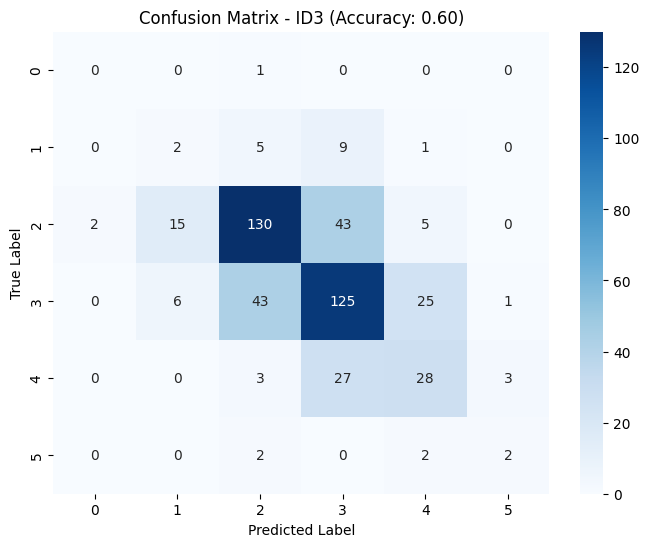

Nguyễn Thành Luân - 6351071043


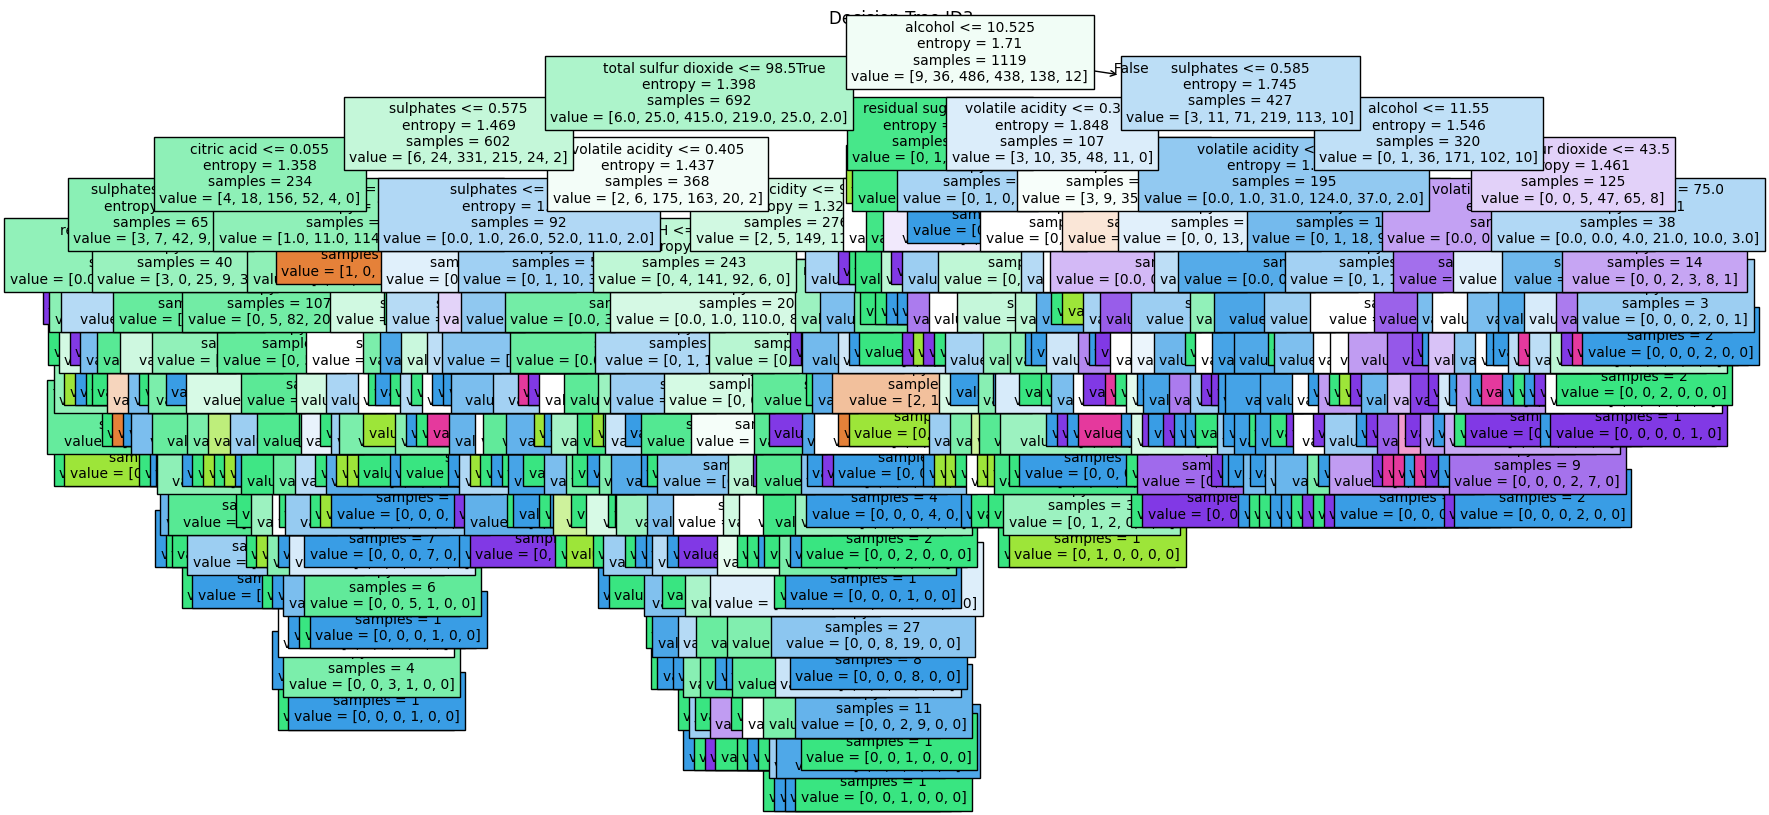

In [12]:
from sklearn import tree
from sklearn import metrics

print("Nguyễn Thành Luân - 6351071043")
clf_id3 = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_id3.fit(X_train, y_train)

id3_pred = clf_id3.predict(X_test)

id3_score = metrics.accuracy_score(y_test, id3_pred)
print("Accuracy (ID3):", id3_score)
print("\nClassification Report:\n", metrics.classification_report(y_test, id3_pred, zero_division=0))

print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, id3_pred), annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - ID3 (Accuracy: {id3_score:.2f})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_id3, feature_names=X.columns, filled=True, fontsize=10)
plt.title("Decision Tree ID3")
plt.show()

8. Cây quyết định CART

Xây dựng mô hình với criterion='gini'.

Nguyễn Thành Luân - 6351071043
Accuracy (CART): 0.5729166666666666

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.66      0.65      0.65       195
           6       0.57      0.60      0.59       200
           7       0.46      0.43      0.44        61
           8       0.33      0.17      0.22         6

    accuracy                           0.57       480
   macro avg       0.35      0.32      0.33       480
weighted avg       0.57      0.57      0.57       480

Nguyễn Thành Luân - 6351071043


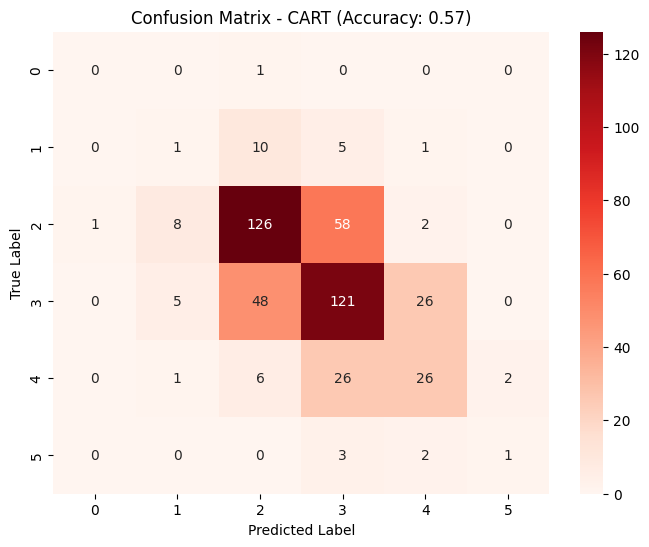

Nguyễn Thành Luân - 6351071043


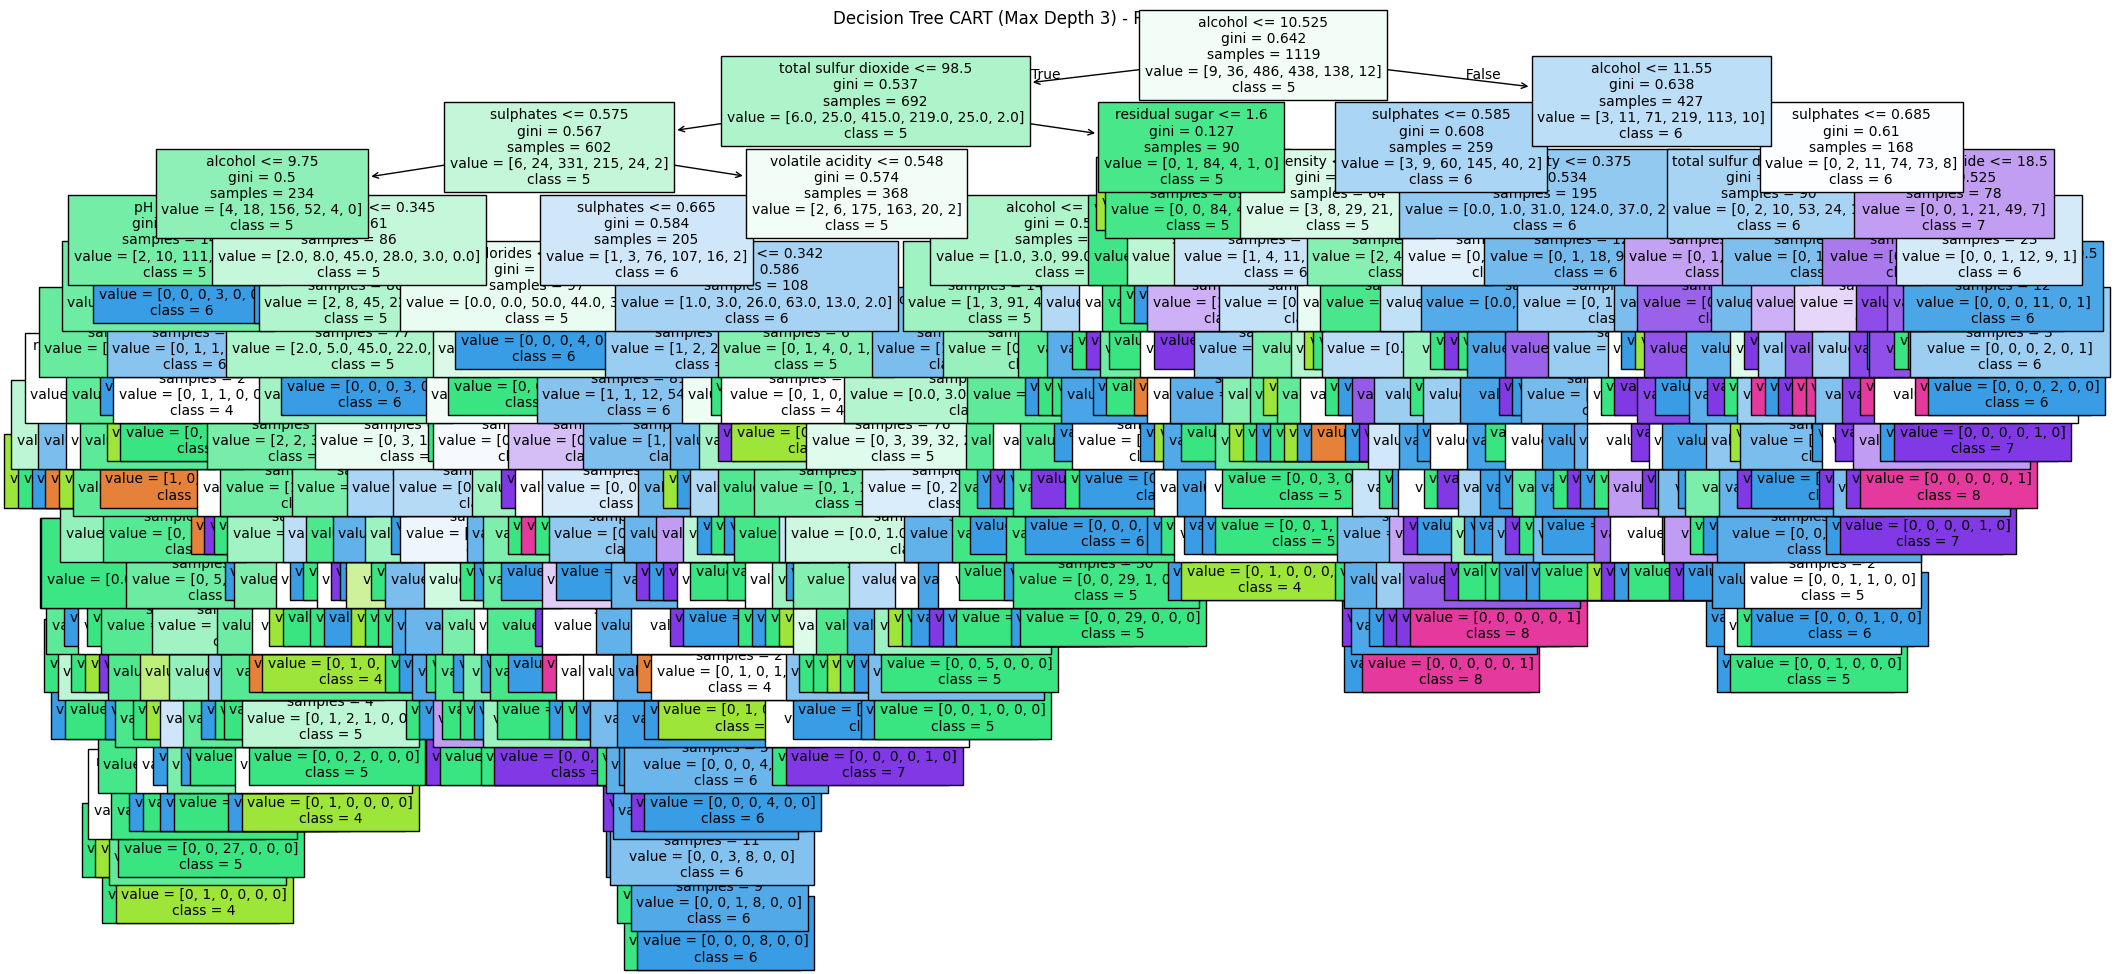

In [13]:
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=42)
clf_cart.fit(X_train, y_train)

cart_pred = clf_cart.predict(X_test)

cart_score = metrics.accuracy_score(y_test, cart_pred)
print("Nguyễn Thành Luân - 6351071043")
print("Accuracy (CART):", cart_score)
print("\nClassification Report:\n", metrics.classification_report(y_test, cart_pred, zero_division=0))


print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(8, 6))

sns.heatmap(metrics.confusion_matrix(y_test, cart_pred), annot=True, fmt="d", cmap="Reds")
plt.title(f"Confusion Matrix - CART (Accuracy: {cart_score:.2f})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(25, 12))

tree.plot_tree(clf_cart,
               feature_names=X.columns,
               class_names=[str(c) for c in clf_cart.classes_],
               filled=True,
               fontsize=10)

plt.title("Decision Tree CART (Max Depth 3) - Red Wine Quality")
plt.savefig('wine_decision_tree_cart.png', dpi=100)
plt.show()

9. Thuật toán Naïve Bayes
Áp dụng Gaussian Naïve Bayes.

Nguyễn Thành Luân - 6351071043
Accuracy (Naïve Bayes): 0.5416666666666666


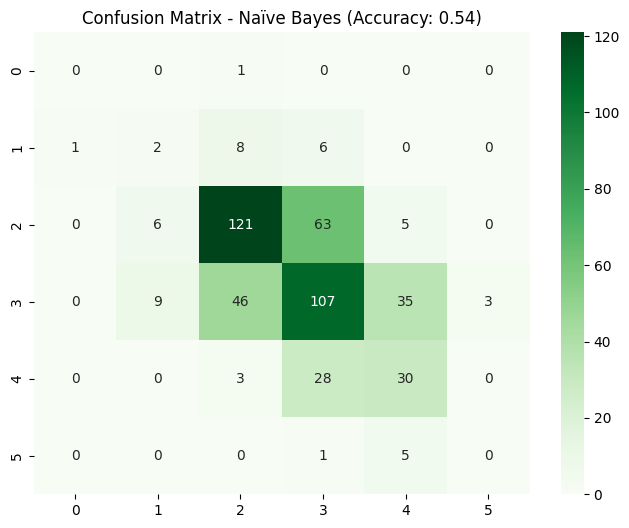

In [14]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
gnb.fit(X_train, y_train)

bayes_pred = gnb.predict(X_test)

bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Nguyễn Thành Luân - 6351071043")
print("Accuracy (Naïve Bayes):", bayes_score)

plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_test, bayes_pred), annot=True, fmt="d", cmap="Greens")
plt.title(f"Confusion Matrix - Naïve Bayes (Accuracy: {bayes_score:.2f})")
plt.show()

10. So sánh kết quả

Tổng hợp và vẽ biểu đồ so sánh.

Nguyễn Thành Luân - 6351071043
         Model  Accuracy
0          ID3  0.597917
1         CART  0.572917
2  Naïve Bayes  0.541667


/tmp/ipython-input-1931132067.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


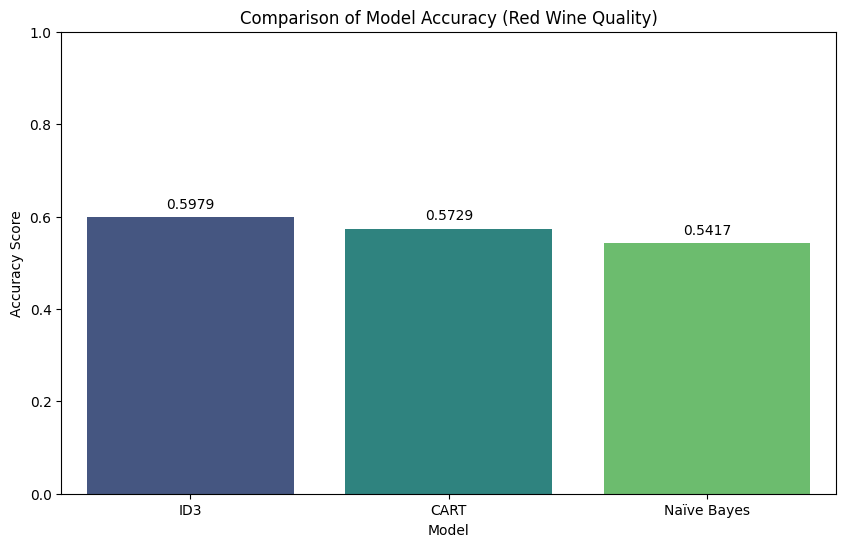

In [15]:
results = pd.DataFrame({
    'Model': ['ID3', 'CART', 'Naïve Bayes'],
    'Accuracy': [id3_score, cart_score, bayes_score]
})
print("Nguyễn Thành Luân - 6351071043")
print(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.ylim(0, 1)
plt.title('Comparison of Model Accuracy (Red Wine Quality)')
plt.ylabel('Accuracy Score')
for index, row in results.iterrows():
    plt.text(index, row.Accuracy + 0.02, f"{row.Accuracy:.4f}", color='black', ha="center")
plt.show()